## 1.1 Importação de Bibliotecas

In [42]:
# Pacotes de preparação dos dados
import numpy as np
import pandas as pd

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de modelagem
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## 1.2 Importação da Base de Dados

In [43]:
df_pagto = pd.read_csv("pagamento.csv")
df_pagto.head()

,Pagou_Divida,Renda_Presumida,Idade
0,0,1583.33,19
1,0,1666.67,35
2,0,3583.33,26
3,0,4750.00,27
4,0,6333.33,19


## 1.3 Preparação dos Dados
# 1.3.1 Missing Values

In [44]:
df_pagto.isnull().sum()

Pagou_Divida       0
Renda_Presumida    0
Idade              0
dtype: int64

# 1.3.2 Duplicações

In [45]:
df_pagto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pagou_Divida     400 non-null    int64  
 1   Renda_Presumida  400 non-null    float64
 2   Idade            400 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 9.5 KB


In [46]:
df_pagto.duplicated().sum()

np.int64(33)

In [47]:
df_pagto.loc[df_pagto.duplicated()].sort_values('Renda_Presumida')

,Pagou_Divida,Renda_Presumida,Idade
150,0,1250.00,26
74,0,1500.00,32
23,1,1833.33,45
383,1,2333.33,49
390,1,2750.00,48
231,0,3500.00,39
393,1,3500.00,60
192,0,3583.33,29
195,0,3583.33,34
246,0,4166.67,35


In [48]:
df_pagto.drop_duplicates(inplace=True)

In [49]:
df_pagto.duplicated().sum()

np.int64(0)

# 1.3.3 Tipos de Variáveis

In [50]:
df_pagto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pagou_Divida     367 non-null    int64  
 1   Renda_Presumida  367 non-null    float64
 2   Idade            367 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 11.5 KB


## 1.4 Análise Exploratória dos Dados
# 1.4.1 Dispersão por Classe

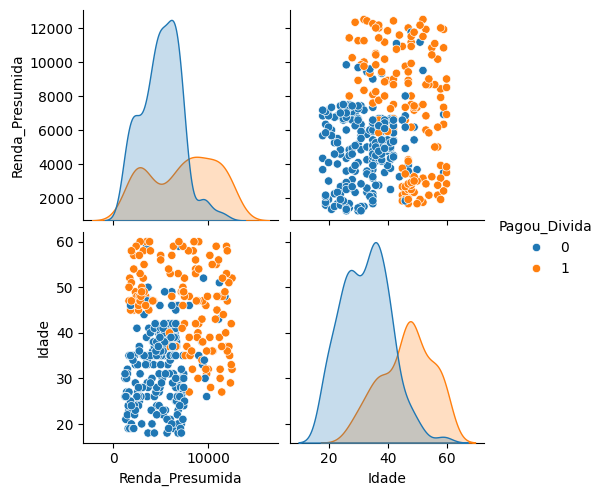

In [51]:
sns.pairplot(df_pagto, hue='Pagou_Divida')

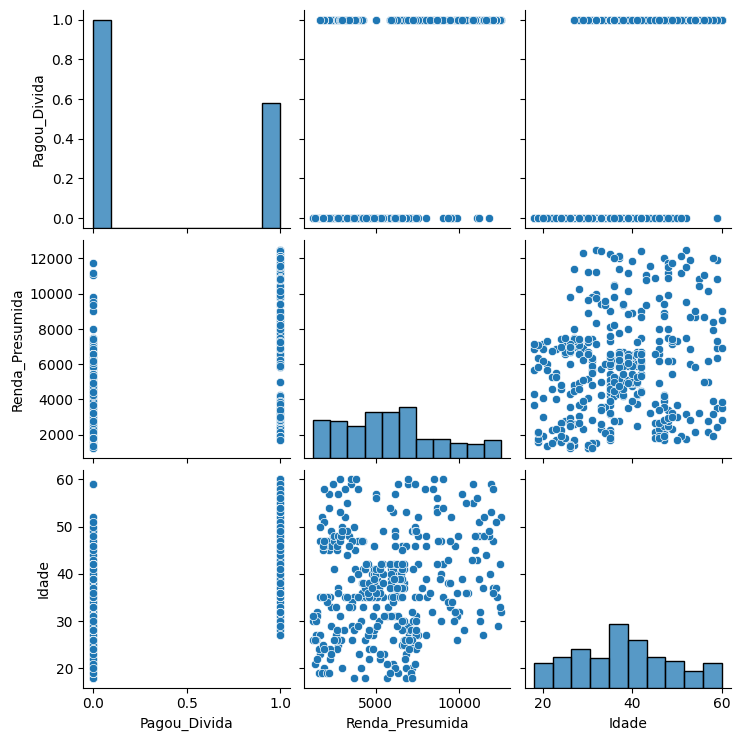

In [52]:
sns.pairplot(df_pagto)

## 1.5 Desenvolvimento do Modelo: K-Means 
# 1.5.1 Padronização da Escala

In [53]:
# Seleção das variáveis
df_modelo = df_pagto[['Renda_Presumida',
                     'Idade']].copy()

# Padronização da Escala
x_scaler = StandardScaler()
x_scaler.fit(df_modelo)

df_modelo_scaled = pd.DataFrame(x_scaler.transform(df_modelo),
                                index=df_modelo.index,
                                columns=df_modelo.columns)

In [54]:
df_modelo.describe()

,Renda_Presumida,Idade
count,367.000000,367.000000
mean,5893.279128,37.722071
std,2897.681266,10.681383
min,1250.000000,18.000000
25%,3583.330000,29.500000
50%,5916.670000,37.000000
75%,7416.670000,46.000000
max,12500.000000,60.000000


In [55]:
df_modelo_scaled.describe()

,Renda_Presumida,Idade
count,3.670000e+02,367.000000
mean,1.548867e-16,0.000000
std,1.001365e+00,1.001365
min,-1.604600e+00,-1.848917
25%,-7.982599e-01,-0.770808
50%,8.083292e-03,-0.067693
75%,5.264453e-01,0.776045
max,2.283115e+00,2.088526


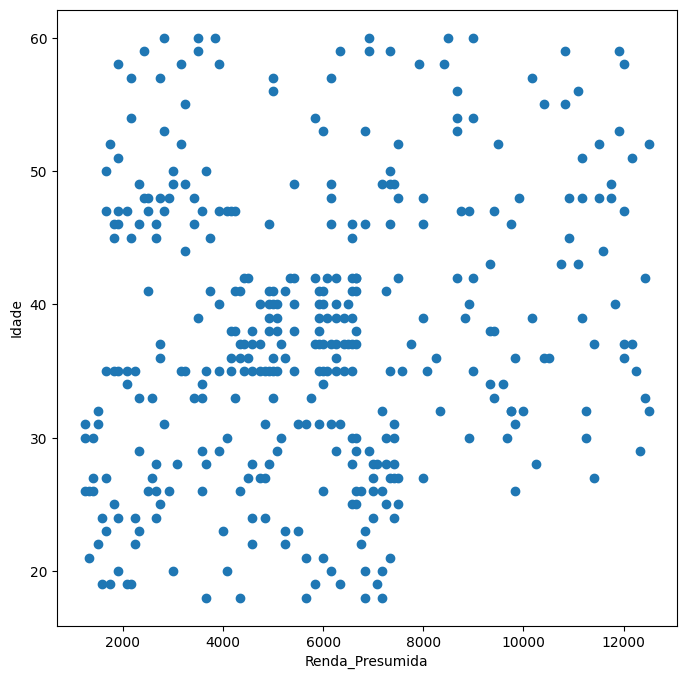

In [56]:
# Plotando Renda_presumida por Idade
fig = plt.figure(figsize=(8,8))
plt.scatter(df_modelo['Renda_Presumida'],
            df_modelo['Idade']);
plt.xlabel('Renda_Presumida');
plt.ylabel('Idade');

## 1.5.2 Treinamento do Modelo
# Dica: Utilize a função treina_modelo_kmeans para facilitar o treinamento e a avaliação dos modelos com diferentes quantidades de clusters

In [57]:
def treina_modelo_kmeans(df_scaled, k, plota_grafico=False):

    # Define e treina um modelo k-means
    modelo_km = KMeans(n_clusters=k, 
                       random_state=42)
    modelo_km.fit(df_scaled)

    # Obtém os clusters preditos
    cluster_predito = modelo_km.predict(df_scaled)

    # Plota os gráficos
    if plota_grafico:
        fig = plt.figure(figsize=(8,8))
        sns.scatterplot(x=df_scaled.iloc[:,0],
                        y=df_scaled.iloc[:,1],
                        hue=cluster_predito)
        
        sns.scatterplot(x=modelo_km.cluster_centers_[:,0],
                        y=modelo_km.cluster_centers_[:,1],
                        marker='x', s=300,
                        linewidth=4, color='red', zorder=10);
        
    return modelo_km, cluster_predito

# 1.5.2.1 Modelo com K = 2

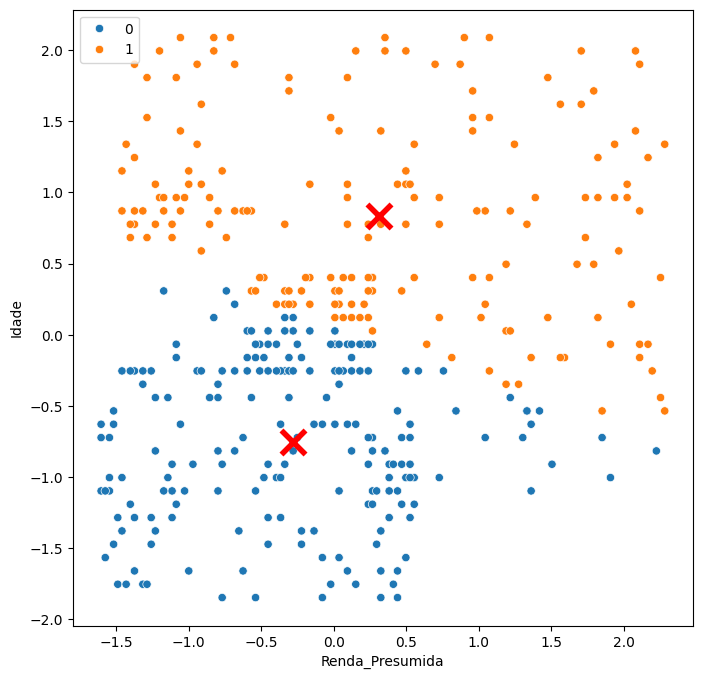

In [58]:
treina_modelo_kmeans(df_scaled=df_modelo_scaled,
                     k=2,
                     plota_grafico=True);

# 1.5.2.2 Modelo com K = 5

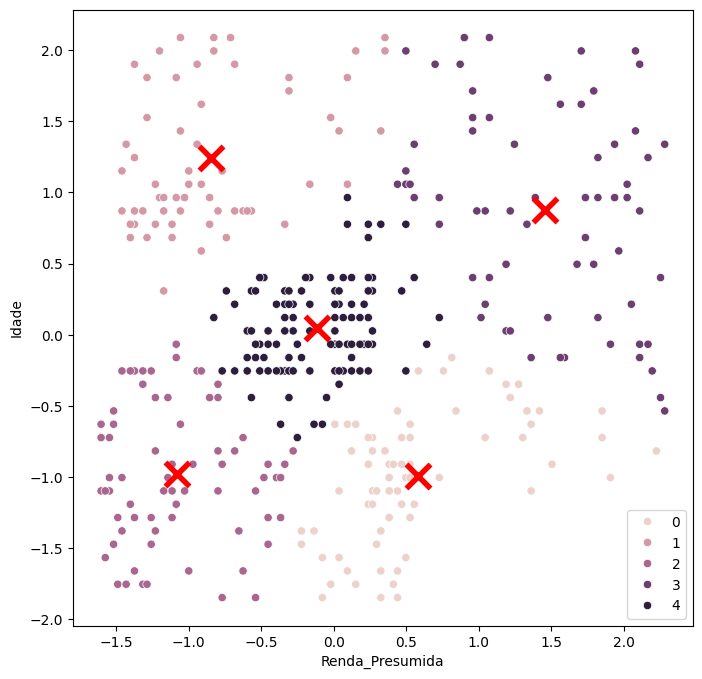

In [59]:
treina_modelo_kmeans(df_scaled=df_modelo_scaled,
                     k=5,
                     plota_grafico=True);

# 1.5.2.3 Modelo com K = 10

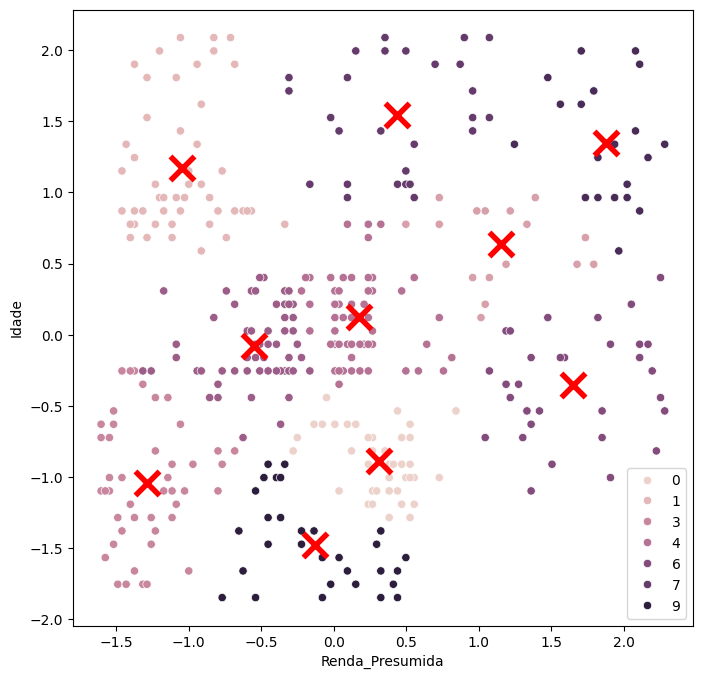

In [60]:
treina_modelo_kmeans(df_scaled=df_modelo_scaled,
                     k=10,
                     plota_grafico=True);

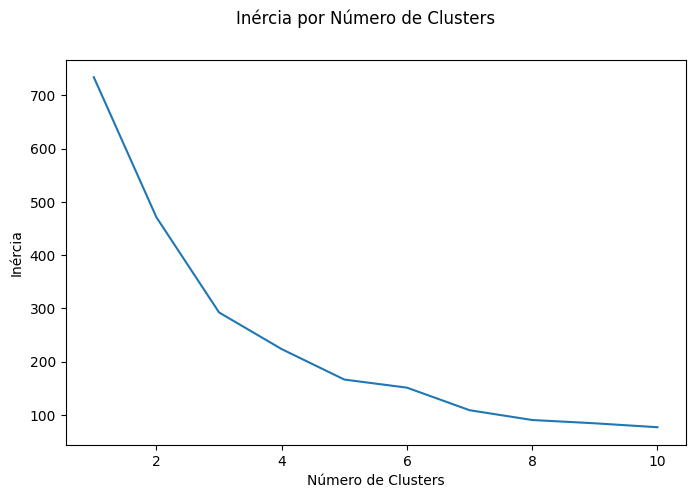

In [ ]:
# Utilizando o Método do Cotovelo (Elbow-curve)
range_n_clusters = np.arange(1,11)
inercia = []
n_clust = []

for num_clusters in range_n_clusters:
    n_clust.append(num_clusters)
    modelo, clust_pred = treina_modelo_kmeans(df_modelo_scaled, 
                                              k=num_clusters)
    
    inercia.append(modelo.inertia_)

fig = plt.figure(figsize=(8,5))
graf = sns.lineplot(x=range_n_clusters,
             y=inercia)
graf.figure.suptitle('Inércia por Número de Clusters');
graf.set_xlabel('Número de Clusters');
graf.set_ylabel('Inércia');

 1 cluster =  700 de inércia
 2 clusters = 500 de inércia
 3 clusters = 300 de inércia
 4 clusters = +200 de inércia (o ganho foi pouco, portanto k = 3) 

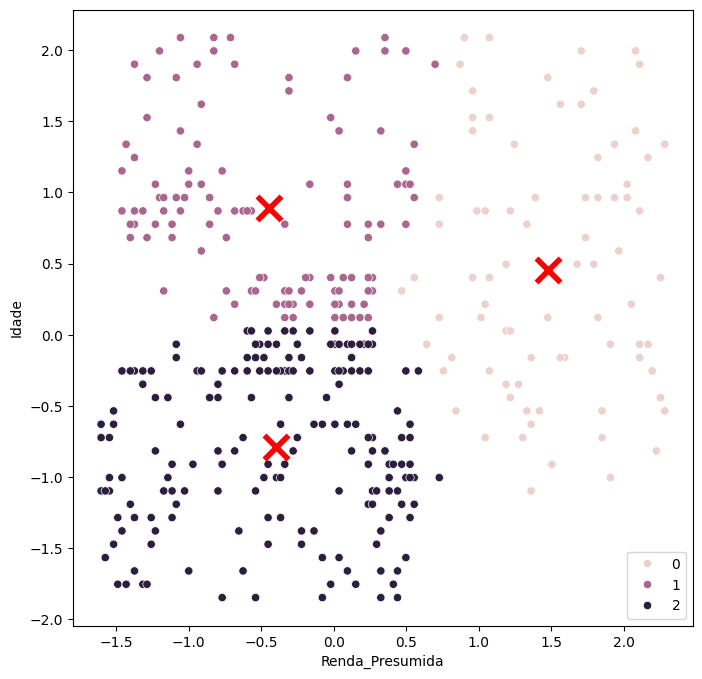

In [ ]:
modelo_km3, clusters_predito = treina_modelo_kmeans(df_scaled=df_modelo_scaled,
                                                    k=3,
                                                    plota_grafico=True)

perto de renda presumida = 0.5, há uma divisão entre clusters
cluster 0 um pouco acima da média de renda presumida
os dois clusters que estão à esquerda são clusters abaixo de renda presumida = 0.5 (1 e 2)

In [65]:
# Calcula e imprime a inércia
inercia = modelo_km3.inertia_
print(f'Inércia do modelo: {inercia}')

Inércia do modelo: 292.2073243201264


## 1.5.5 Interpretação e Caracterização dos Clusters
ATENÇÃO: deve-se utilizar o método predict do modelo desenvolvido sobre o DataFrame com as variáveis padronizadas para identificar os clusters das observações no DataFrame original.

In [ ]:
df_modelo['cluster'] = clusters_predito

In [ ]:
df_modelo.groupby('cluster').describe().T

cluster                           0            1            2
Renda_Presumida count     81.000000   112.000000   174.000000
                mean   10177.984074  4597.470714  4732.758678
                std     1436.730220  1792.644237  1926.146958
                min     7250.000000  1666.670000  1250.000000
                25%     9000.000000  2979.167500  3020.832500
                50%    10000.000000  4833.335000  4916.670000
                75%    11416.670000  6166.670000  6416.670000
                max    12500.000000  7916.670000  8000.000000
Idade           count     81.000000   112.000000   174.000000
                mean      42.604938    47.232143    29.327586
                std        9.261046     6.351537     5.936235
                min       26.000000    39.000000    18.000000
                25%       35.000000    41.000000    25.000000
                50%       42.000000    47.000000    29.000000
                75%       49.000000    50.250000    35.000000
                max       60.000000    60.000000    38.000000

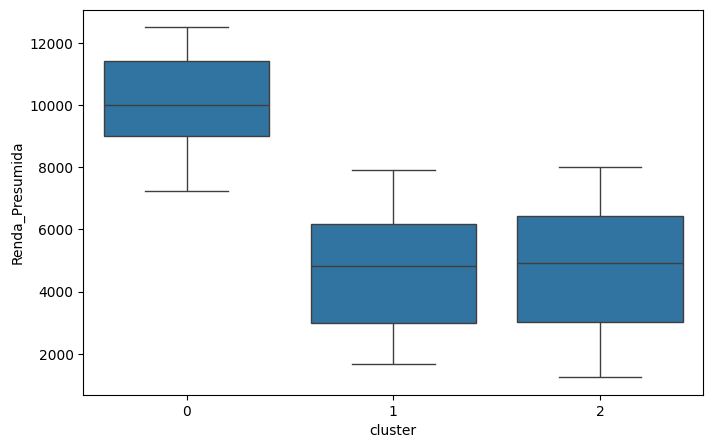

In [ ]:
# Análise dos clusters em relação à Renda Presumida
fig = plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',
            y='Renda_Presumida',
            data=df_modelo);

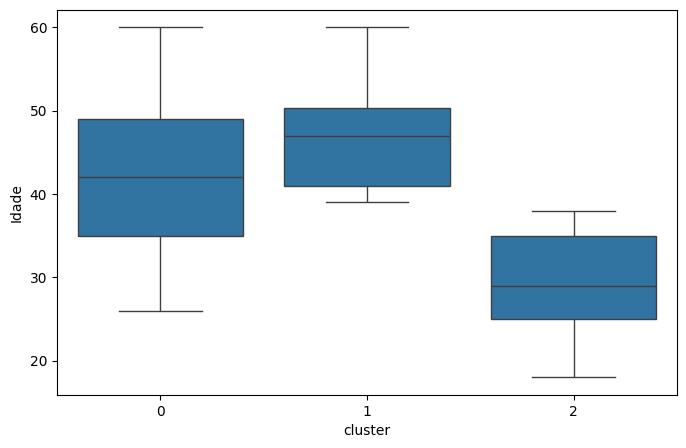

In [ ]:
# Análise dos clusters em relação à Idade
fig = plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',
            y='Idade',
            data=df_modelo);

## 1.5.6 Avaliação dos Clusters em relação ao Pagamento
Como nesta base foram fornecidas as informações de pagamento, avaliou-se também o percentual de clientes que
pagou as dívidas em cada um dos clusters 

In [ ]:
df_cluster_divida = pd.concat([df_modelo[['cluster']],
                               df_pagto[['Pagou_Divida']]],
                               axis=1)
df_cluster_divida.head()

,cluster,Pagou_Divida
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0


In [ ]:
df_cluster_divida.pivot_table(values='Pagou_Divida',
                              index='cluster')

,Pagou_Divida
cluster,
0,0.851852
1,0.571429
2,0.028736
